In [2]:
import pandas as pd
import numpy as np
import nltk

import warnings
warnings.filterwarnings('ignore')

In [3]:
tweets_file = "tweets_daily/"

# months 
march_tweets = tweets_file+"March/csv/"
april_tweets = tweets_file+"April/csv/"
may_tweets = tweets_file+"May/csv/"
june_tweets = tweets_file+"June/csv/"
july_tweets = tweets_file+"July/csv/"

In [4]:
# prepare df for a month
start_date = 1
end_date = 29

april_df = pd.DataFrame()

for i in range(start_date,end_date+1):
    temp_df = pd.read_csv(april_tweets+"april_"+str(i))
    april_df = april_df.append(temp_df)

In [5]:
april_df.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Wed Apr 01 13:00:13 +0000 2020,NaN,https://twitter.com/dare_darou/status/12434969...,NaN,0,1245335157210570753,NaN,NaN,NaN,...,161,126,0,"Johor Bahru, Johor",hadi,hadizainal_,29395,NaN,NaN,False
1,NaN,Wed Apr 01 13:48:15 +0000 2020,NaN,NaN,https://twitter.com/AnilMJacob25/status/124529...,0,1245347245207126016,kamath_nandini,1.245347e+18,7.065151e+17,...,470,350,1,India,Nandini Kamath,kamath_nandini,160201,NaN,NaN,False
2,NaN,Wed Apr 01 17:44:35 +0000 2020,NaN,NaN,NaN,1,1245406722677567488,jjani_ca,1.245407e+18,9.248525e+17,...,292,228,1,NaN,ⁿⁱᶜᵃ,jjani_ca,11399,NaN,NaN,False
3,NaN,Thu Apr 02 05:32:17 +0000 2020,NaN,NaN,https://twitter.com/Purba_Ray/status/124556797...,26,1245584819846709254,NaN,NaN,NaN,...,394671,3236,540,"Mumbai, India",out of context aditi mittal,awryaditi,120017,NaN,http://aditimittal.com,True
4,NaN,Wed Apr 01 11:45:28 +0000 2020,NaN,NaN,NaN,0,1245316347367755778,NaN,NaN,NaN,...,88,80,0,"Omaha, NE",S W E E T - T A I,SweeetTai,14122,NaN,http://www.instagram.com/colormechelleee,False


In [6]:
# missing data
import missingno as msno
%matplotlib inline

<AxesSubplot:>

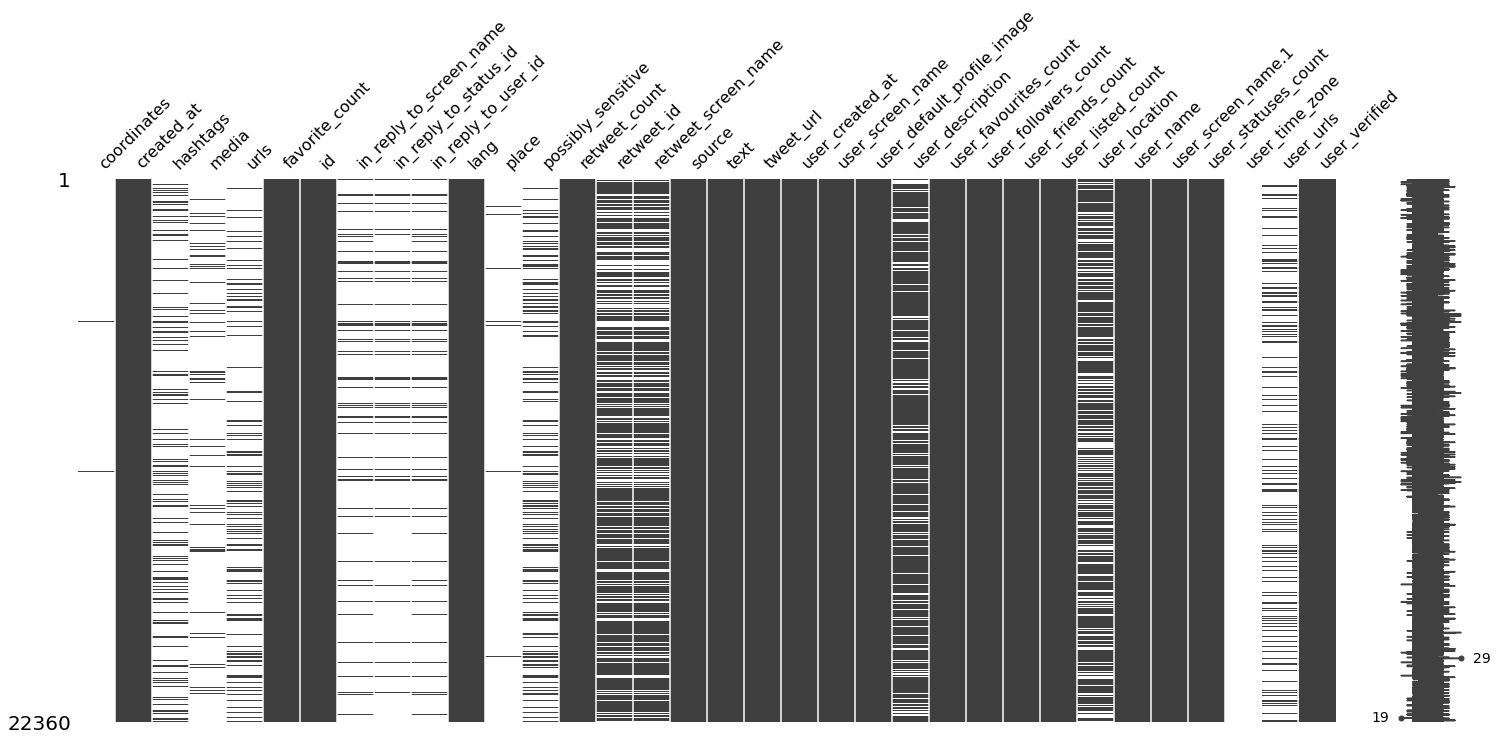

In [7]:
msno.matrix(april_df)

In [8]:
april_df.columns

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

In [10]:
april_sample = april_df[:500]

In [ ]:
# text

# .str.replace('/',' ').astype('S32')
april_sample['user_location']

In [ ]:
april_sample.dtypes

In [ ]:
# supervised 

# unsupervised
# clustering

In [26]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

In [39]:
# text preprocessing 
import re

#remove links
#remove @ mentions
#remove RT
#remove special characters, and extra whitespace
#stemming/lemmatization

def remove_stopwords(tokens):
    clean_tokens = []
    for w in tokens:  
        if w not in stop_words:  
            clean_tokens.append(w)  
    return clean_tokens
    
# removing links
april_sample['text_clean'] =  [re.sub(r"http\S+", "", str(x)) for x in april_sample['text']]

# removing @
april_sample['text_clean'] =  [re.sub(r"@\S+", "", str(x)) for x in april_sample['text_clean']]

# removing RTs
april_sample['text_clean'] =  [str(x).replace("RT", "") for x in april_sample['text_clean']]

# Remove all the special characters
april_sample['text_clean'] = [re.sub(r'\W', ' ',  str(x)) for x in april_sample['text_clean']]

# remove all single characters
april_sample['text_clean']= [re.sub(r'\s+[a-zA-Z]\s+', ' ', str(x)) for x in april_sample['text_clean']]

# convert to lowercase
april_sample['text_clean']= [str(x).lower() for x in april_sample['text_clean']]

# Substituting multiple spaces with single space
april_sample['text_clean'] = [re.sub(r'\s+', ' ', str(x)) for x in april_sample['text_clean']] 

# tokenization
april_sample['tokenized'] = [word_tokenize(str(x)) for x in april_sample['text_clean']] 

# stopword removal
april_sample['clean_tokens'] = [remove_stopwords(x) for x in april_sample['tokenized']]  

# stemming

#load the stopwords from nltk
#for word not in stopwords

In [34]:
april_sample['text']
april_sample['text_clean']
april_sample['tokenized']
april_sample['clean_tokens']

0      RT @dare_darou: What You May Have Missed Becau...
1      @NagpurKaRajini This one too\nHope you enjoy \...
2      ++ corona virus will not kill u, ignorance ind...
3      This is the reason we need to stop jumping dow...
4      RT @Lexie_Quiles: corona really said fuck your...
                             ...                        
495    @davido Lolz. So probably all this Numbers Nig...
496    RT @IExpressSouth: In #AndhraPradesh #coronavi...
497    Nobody knows anything about how this corona vi...
498    RT @ShefVaidya: Hi @sardesairajdeep, why didn’...
499    RT @mistameister: This Corona impact on busine...
Name: text, Length: 500, dtype: object

In [35]:
# word count
# frequency
# word cloud

0       what you may have missed because of corona vi...
1                           this one too hope you enjoy 
2           corona virus will not kill ignorance indeed 
3      this is the reason we need to stop jumping dow...
4       corona really said fuck your birthday fuck yo...
                             ...                        
495     lolz so probably all this numbers nigeria has...
496     in andhrapradesh coronavirus cases rose from ...
497    nobody knows anything about how this corona vi...
498     hi why didn you invite an infected tablighee ...
499     this corona impact on business feels like too...
Name: text_clean, Length: 500, dtype: object

In [40]:
# generate corpus of hashtagged words
april_hashtags = april_df['hashtags']
clean_april_hashtags = april_hashtags[~april_hashtags.isnull()]

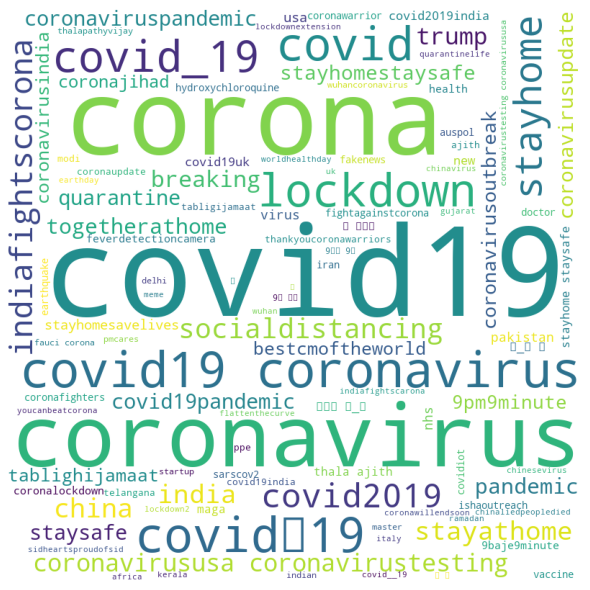

In [46]:
# wordcloud for hashtags
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

hashtag_words = ''
stopwords = set(STOPWORDS)

for hashtags in clean_april_hashtags:
    hashtags = str(hashtags)
    tokens = hashtags.split()
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    hashtag_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(hashtag_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

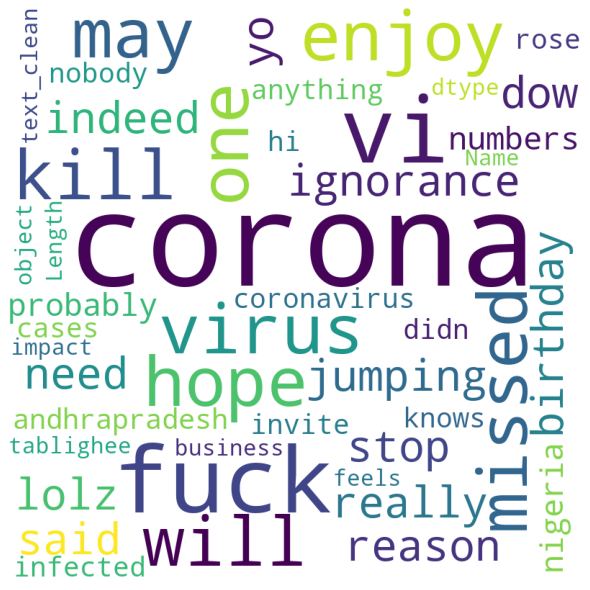

In [45]:
# wordlcoud for tweets
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(str(april_sample['text_clean'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 